# Linear Regression

#### In this analysis we will go over how to perform linear regression in Python.  

#### We are going to try to predict the popularity of a song based on a couple of different factors.

Primary:
- id (Id of track generated by Spotify)

Numerical:
- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0)
- speechiness (Ranges from 0 to 1)
- year (Ranges from 1921 to 2020)

Dummy:
- mode (0 = Minor, 1 = Major)
- explicit (0 = No explicit content, 1 = Explicit content)

Categorical:
- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)
- artists (List of artists mentioned)
- release_date (Date of release mostly in yyyy-mm-dd format, however precision of date may vary)
- name (Name of the song)

In [2]:
import pandas as pd
import statsmodels.api as sm # this lets us get R data into python
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
spotify = pd.read_csv('Datasets/spotify_data.csv')
pd.options.display.max_columns = None

In [4]:
spotify.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [5]:
spotify.describe(include='all')

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
count,174389.000000,174389,174389.000000,1.743890e+05,174389.000000,174389.000000,174389,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389,174389.000000,174389,174389.000000,174389.000000,174389.000000,174389.000000
unique,NaN,36195,NaN,NaN,NaN,NaN,172230,NaN,NaN,NaN,NaN,NaN,137013,NaN,11043,NaN,NaN,NaN,NaN
top,NaN,['Tadeusz Dolega Mostowicz'],NaN,NaN,NaN,NaN,1xQvPFljQXA3GCK869ERvC,NaN,NaN,NaN,NaN,NaN,White Christmas,NaN,1945,NaN,NaN,NaN,NaN
freq,NaN,1281,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,103,NaN,1447,NaN,NaN,NaN,NaN
mean,0.499228,NaN,0.536758,2.328100e+05,0.482721,0.068135,NaN,0.197252,5.205305,0.211123,-11.750865,0.702384,NaN,25.693381,NaN,0.105729,117.006500,0.524533,1977.061764
std,0.379936,NaN,0.176025,1.483958e+05,0.272685,0.251978,NaN,0.334574,3.518292,0.180493,5.691591,0.457211,NaN,21.872740,NaN,0.182260,30.254178,0.264477,26.907950
min,0.000000,NaN,0.000000,4.937000e+03,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,-60.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,1920.000000
25%,0.087700,NaN,0.414000,1.661330e+05,0.249000,0.000000,NaN,0.000000,2.000000,0.099200,-14.908000,0.000000,NaN,1.000000,NaN,0.035200,93.931000,0.311000,1955.000000
50%,0.517000,NaN,0.548000,2.057870e+05,0.465000,0.000000,NaN,0.000524,5.000000,0.138000,-10.836000,1.000000,NaN,25.000000,NaN,0.045500,115.816000,0.536000,1977.000000
75%,0.895000,NaN,0.669000,2.657200e+05,0.711000,0.000000,NaN,0.252000,8.000000,0.270000,-7.499000,1.000000,NaN,42.000000,NaN,0.076300,135.011000,0.743000,1999.000000


In [6]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

In [7]:
numeric_variables = spotify.select_dtypes(include=['float64'])

In [8]:
corrplot = spotify.corr() 
corrplot

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
acousticness,1.000000,-0.263217,-0.089169,-0.750852,-0.208176,0.221956,-0.028028,-0.029654,-0.546639,0.064633,-0.396744,-0.022437,-0.223840,-0.166968,-0.607515
danceability,-0.263217,1.000000,-0.100757,0.204838,0.200842,-0.215589,0.026266,-0.110033,0.249541,-0.048358,0.123746,0.239962,0.005479,0.536713,0.159095
duration_ms,-0.089169,-0.100757,1.000000,0.060516,-0.033808,0.103621,0.002020,0.028942,0.019791,-0.046849,0.024717,-0.097838,-0.008182,-0.183199,0.105661
energy,-0.750852,0.204838,0.060516,1.000000,0.102561,-0.177750,0.035780,0.134815,0.779267,-0.056160,0.328939,-0.112616,0.266448,0.326418,0.540850
explicit,-0.208176,0.200842,-0.033808,0.102561,1.000000,-0.130609,0.005282,0.037288,0.106249,-0.062503,0.152545,0.353872,0.008075,-0.009275,0.151619
instrumentalness,0.221956,-0.215589,0.103621,-0.177750,-0.130609,1.000000,-0.004619,-0.047941,-0.317562,-0.056731,-0.300625,-0.133966,-0.068656,-0.219188,-0.114259
key,-0.028028,0.026266,0.002020,0.035780,0.005282,-0.004619,1.000000,-0.003368,0.025227,-0.127397,0.001951,0.009648,0.005009,0.025592,0.019194
liveness,-0.029654,-0.110033,0.028942,0.134815,0.037288,-0.047941,-0.003368,1.000000,0.062695,0.001677,-0.078959,0.122034,0.008586,-0.005781,-0.011852
loudness,-0.546639,0.249541,0.019791,0.779267,0.106249,-0.317562,0.025227,0.062695,1.000000,-0.019250,0.337194,-0.213504,0.217914,0.302520,0.465189
mode,0.064633,-0.048358,-0.046849,-0.056160,-0.062503,-0.056731,-0.127397,0.001677,-0.019250,1.000000,0.007652,-0.040711,0.002438,0.021592,-0.048922


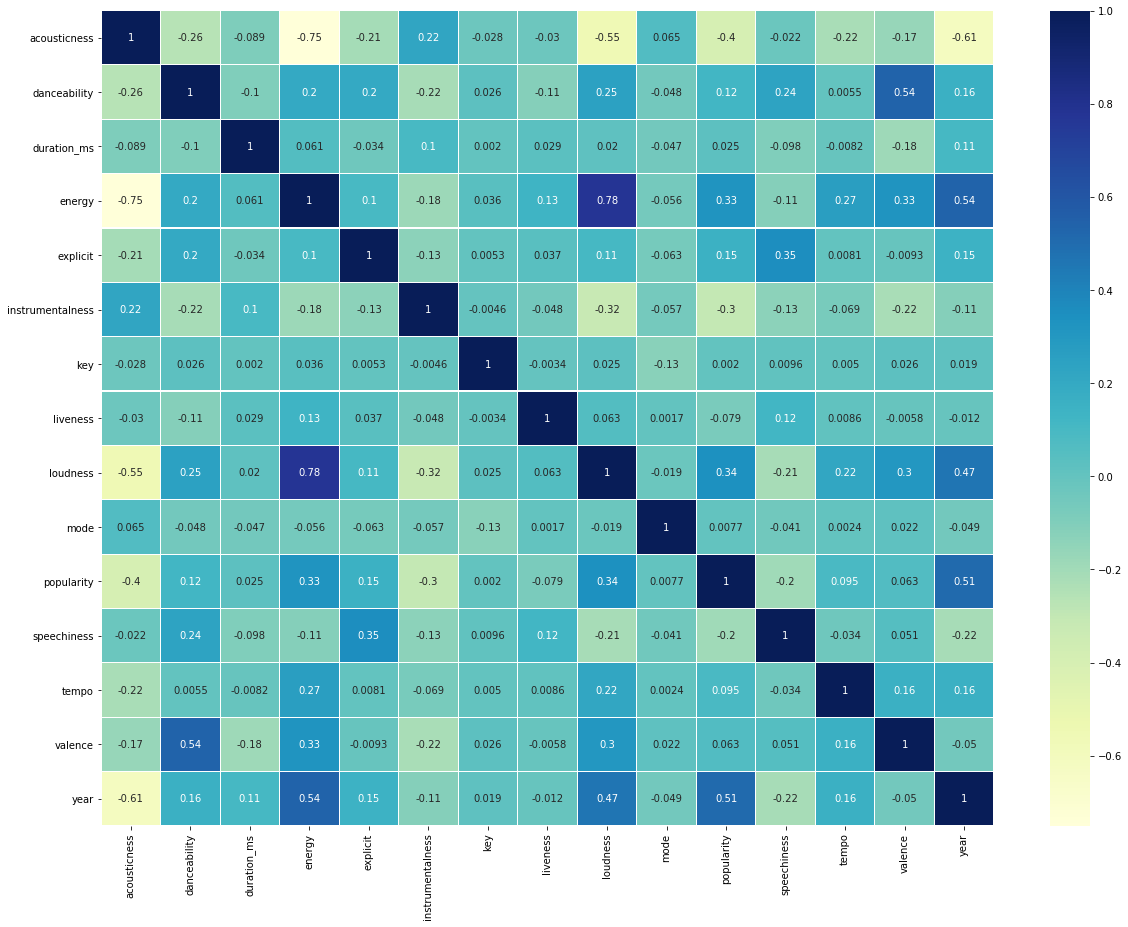

In [9]:
f, ax = plt.subplots(figsize =(20, 15)) 
sns.heatmap(corrplot, ax = ax, cmap ="YlGnBu", linewidths = 0.1, annot = True, )

### We see from the correlation matrix that we have quite a few variables that should work for our purposes

In [10]:
# I am changing the categorical variable key, because it is a category and does not have any implicit relationship.  If I dont and keep the key as 0-11 then it will assume a certain relationship that doesnt exist.

dummies = pd.get_dummies(spotify['key'])

spotify = pd.concat([spotify, dummies], axis = 1)

del spotify['key']

In [11]:
# Rename the categorical variables
spotify = spotify.rename(columns={0: "C", 1: "C_Sharp", 2: "D", 3: "D_Sharp", 4: "E", 5: "F", 6: "F_Sharp", 7: "G", 8: "G_Sharp", 9: "A", 10: "A_Sharp", 11: "B"})

In [12]:
spotify.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,C,C_Sharp,D,D_Sharp,E,F,F_Sharp,G,G_Sharp,A,A_Sharp,B
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920,0,0,0,0,0,1,0,0,0,0,0,0
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920,0,0,0,0,0,1,0,0,0,0,0,0
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920,1,0,0,0,0,0,0,0,0,0,0,0
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920,0,0,1,0,0,0,0,0,0,0,0,0
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920,0,0,0,0,0,0,0,0,0,0,1,0


In [28]:
ind_variables = spotify.drop(columns=['artists', 'C', 'id', 'name', 'release_date', 'year'])

dep_variable = spotify['popularity'].values

In [29]:
ind_variables

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,mode,popularity,speechiness,tempo,valence,C_Sharp,D,D_Sharp,E,F,F_Sharp,G,G_Sharp,A,A_Sharp,B
0,0.991000,0.598,168333,0.224,0,0.000522,0.3790,-12.628,0,12,0.0936,149.976,0.6340,0,0,0,0,1,0,0,0,0,0,0
1,0.643000,0.852,150200,0.517,0,0.026400,0.0809,-7.261,0,7,0.0534,86.889,0.9500,0,0,0,0,1,0,0,0,0,0,0
2,0.993000,0.647,163827,0.186,0,0.000018,0.5190,-12.098,1,4,0.1740,97.600,0.6890,0,0,0,0,0,0,0,0,0,0,0
3,0.000173,0.730,422087,0.798,0,0.801000,0.1280,-7.311,1,17,0.0425,127.997,0.0422,0,1,0,0,0,0,0,0,0,0,0
4,0.295000,0.704,165224,0.707,1,0.000246,0.4020,-6.036,0,2,0.0768,122.076,0.2990,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.009170,0.792,147615,0.866,0,0.000060,0.1780,-5.089,0,0,0.0356,125.972,0.1860,0,0,0,0,0,1,0,0,0,0,0
174385,0.795000,0.429,144720,0.211,0,0.000000,0.1960,-11.665,1,0,0.0360,94.710,0.2280,0,0,0,1,0,0,0,0,0,0,0
174386,0.806000,0.671,218147,0.589,0,0.920000,0.1130,-12.393,0,0,0.0282,108.058,0.7140,0,0,0,1,0,0,0,0,0,0,0
174387,0.920000,0.462,244000,0.240,1,0.000000,0.1130,-12.077,1,69,0.0377,171.319,0.3200,0,0,0,0,0,0,0,0,0,0,0


In [30]:
x = sm.add_constant(ind_variables)

In [31]:
spotify.lm = sm.OLS(dep_variable, x).fit()

In [32]:
spotify.lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.049e+32
Date:                Fri, 12 Feb 2021   Prob (F-statistic):               0.00
Time:                        10:48:50   Log-Likelihood:             4.8682e+06
No. Observations:              174389   AIC:                        -9.736e+06
Df Residuals:                  174364   BIC:                        -9.736e+06
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             6.661e-14   4.76e-15     13.986      0.000    5.73e-14    7.59e-14
acousticness      -4.73e-14   1.95e-15    -24.299      0.000   -5.11e-14   -4.35e-14
danceability      3.886e-15   3.29e-15      1.180      0.238   -2.57e-15    1.03e-14
duration_ms       -6.47e-19   3.04e-21   -212.722      0.000   -6.53e-19   -6.41e-19
energy           -3.575e-14   3.56e-15    -10.031      0.000   -4.27e-14   -2.88e-14
explicit         -1.643e-14   1.96e-15     -8.393      0.000   -2.03e-14   -1.26e-14
instrumentalness  9.992e-16   1.52e-15      0.659      0.510   -1.97e-15    3.97e-15
liveness          1.266e-14   2.54e-15      4.985      0.000    7.68e-15    1.76e-14
loudness          9.714e-17   1.37e-16      0.709      0.478   -1.71e-16    3.66e-16
mode              1.207e-15   9.89e-16      1.220      0.222   -7.32e-16    3.15e-15
popularity           1.0000   2.36e-17   4.23e+16      0.000       1.000       1.000
speechiness      -1.732e-14   2.98e-15     -5.802      0.000   -2.32e-14   -1.15e-14
tempo            -1.028e-16   1.52e-17     -6.776      0.000   -1.33e-16   -7.31e-17
valence          -2.731e-14   2.19e-15    -12.478      0.000   -3.16e-14    -2.3e-14
C_Sharp          -7.355e-15      2e-15     -3.671      0.000   -1.13e-14   -3.43e-15
D                -5.052e-15   1.81e-15     -2.795      0.005   -8.59e-15   -1.51e-15
D_Sharp          -3.719e-15   2.47e-15     -1.505      0.132   -8.56e-15    1.12e-15
E                -9.701e-15   2.02e-15     -4.813      0.000   -1.37e-14   -5.75e-15
F                  3.58e-15   1.88e-15      1.903      0.057   -1.08e-16    7.27e-15
F_Sharp          -2.609e-15   2.28e-15     -1.146      0.252   -7.07e-15    1.85e-15
G                  -5.6e-15   1.75e-15     -3.201      0.001   -9.03e-15   -2.17e-15
G_Sharp          -6.412e-15   2.15e-15     -2.983      0.003   -1.06e-14    -2.2e-15
A                -6.106e-15   1.84e-15     -3.325      0.001   -9.71e-15   -2.51e-15
A_Sharp          -2.415e-15   2.05e-15     -1.176      0.239   -6.44e-15    1.61e-15
B                -8.327e-17   2.16e-15     -0.038      0.969   -4.32e-15    4.16e-15
==============================================================================
Omnibus:                   282462.225   Durbin-Watson:                   0.525
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        378075121.649
Skew:                          10.476   Prob(JB):                         0.00
Kurtosis:                     230.141   Cond. No.                     3.77e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.77e+06. This might indicate that there are
strong multicollinearity or other numerical pr

### Looks like things are overfit. This means that we have multicoliniarity in our model.

# What do I need

Variable selection methods ( will do this in different thing)
vif
carlo whatever (telling us what sort of transformation to do)

In [ ]:
# Residuals vs fitted values plot

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lin_reg, y)    

In [ ]:
def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')

homoscedasticity_test(lin_reg)

In [ ]:
# Histagram of the residuals vs fitted.values

def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
    sm.ProbPlot(model.resid).qqplot(line='s');
    plt.title('Q-Q plot');

    jb = stats.jarque_bera(model.resid)
    sw = stats.shapiro(model.resid)
    ad = stats.anderson(model.resid, dist='norm')
    ks = stats.kstest(model.resid, 'norm')
    
    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')
    
normality_of_residuals_test(lin_reg)

In [ ]:
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = retail_sales.drop(columns=['Total_Net_Sales', 'Gross_Sales']).columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(retail_sales.drop(columns=['Total_Net_Sales', 'Gross_Sales']).values, i) 
                          for i in range(len(retail_sales.drop(columns=['Total_Net_Sales', 'Gross_Sales']).columns))] 
  

In [ ]:
# Training and Testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("RMS: %r " % np.sqrt(np.mean((ypred - y_test) ** 2)))
RMSE = mean_squared_error(y_test, ypred)
print("RMSE: %r " % RMSE)